<a href="https://colab.research.google.com/github/2pterons/training/blob/main/MachineLearning/%ED%98%BC%EC%9E%90%20%EA%B3%B5%EB%B6%80%ED%95%98%EB%8A%94%20%EB%A8%B8%EC%8B%A0%EB%9F%AC%EB%8B%9D%2B%EB%94%A5%EB%9F%AC%EB%8B%9D/%EA%B8%B0%EC%B4%88%ED%8E%B8_2_2_%EB%8D%B0%EC%9D%B4%ED%84%B0_%EC%A0%84%EC%B2%98%EB%A6%AC.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 지난시간 복습
1. **머신러닝 알고리즘의 분류 3개**  
: 지도학습 | 비지도학습 | 강화학습  
- 지도학습 : 학습을 위해 훈련데이터에 입력과 타깃이 함께 제공 되어야한다. 즉, 훈련데이터에 문제와 정답이 함께 존재한다. 따라서 지도학습을 위해서는 알고자하는 문제의 정답이 있어야한다.  
- 비지도학습 : 타깃이 없거나 구할 수 없을 때 입력값만 가지고 사용하는 것.
- 강화학습 : 위 두개와는 다른 알고리즘으로 프로그램의 에이전트가 주어진 환경에서 수행하면서 얻어지는 보상을 최대화 하기 위해서 학습하는 모델
환경은 물리적 환경일 수도 있지만, 주로 소프트웨어적으로 주어지는 환경을 뜻한다.  
  
2. **데이터**  
우리는 지난 시간동안 도미와 빙어를 구분하는 문제를 풀어봤다.  
길이와 무게, 두개의 특성을 사용했었고 타깃은 **이진분류**의 경우 Yes/No, True/False, 1/0과 같이 OX퀴즈라고 볼 수 있다.  
이렇게 찾고자 하는 대상을 양성클래스(Positive Class)라고 하고 1로 표시하며, 찾고자 하는 대상이 아닌 경우 음성클래스(Nagative Class)라고 하고 0으로 표시하며 해당 이진 분류를 Targit 데이터로 만든다.  
대부분의 머신러닝 알고리즘은 이와 같은 방식으로 데이터를 주입하길 권장(?)하며 사이킷런과 텐서플로우도 마찬가지로 해당 방식의 데이터를 기대한다.  
우리가 사용한 데이터에서 도미와 빙어를 구분할 때 도미를 찾기 원한다면 도미를 1, 빙어를 찾길 원한다면 빙어를 1로 둔다. (즉, 찾고자 하는 대상이 양성클래스인 것이다. *따로 좋고 나쁘고가 있는 것이 아님.*)  
우리가 기억해야하는 것은 지난 시간에 배웠던 훈련 데이터셋과 테스트 데이터셋의 분류를 어떻게 진행했는가? 이다.  
훈련데이터로 다시 테스트를 진행하는 것은 옳지 못하다고 지난 시간에 말했을 것이다.  
따라서 올바른 구현이라고 평가 받기 위해서는 훈련에 사용하지 않은 데이터를 테스트에 사용하는 것이 당연하고 직관적이고 상식적인 것이다.  
때문에 우리는 훈련 데이터를 훈련세트로 상당부분을 활용하고 적당히 20% 정도를 테스트세트로 떨궈내서 사용했던 것이다.  
또한 훈련 세트와 테스트 세트를 분류할 때는 주의해야 할 점이 있는데 첫번째는 입력 데이터와 타깃 데이터가 잘못 섞이는 것을 방지하기 위해 인덱스값을 기준으로 섞는 방식을 사용하는 것이고  
두번째는 훈련데이터 세트 안에 빙어와 도미의 특성을 골고루 섞어 학습해야한다는 것이다. 만약 훈련데이터 세트에 기본데이터를 하나도 포함시키지 않고 모델을 훈련시키면 올바르게 예측을 할 수 없는 것과 같다. 이는 확률 통계를 가르치지 않고 확률 통계 문제를 내는 것과 같은 꼴이 될 수 있다.  
쉽게말해 학습 세트와 테스트 세트를 구분할 때 훈련 세트 안에 빙어 데이터와 도미 데이터가 모두 들어가 학습되어야 테스트에 공정한 평가가 가능하다는 것이다.  따라서 훈련세트에 클래스별 특성을 골고루 섞어주는 것이 중요하다.
클래스란 한쪽에 몰려있는 데이터끼리 분류된 집합을 말하며 **분류하려는 종류를 클래스**라고 한다.  
정리하자면 ** 훈련 세트 안에는 클래스 별 데이터가 모두 포함되어야한다 ** 라고 할 수 있다. 이와 반대 되는 경우, 즉 클래스가 특정 한두개 편중되어있는 것을 샘플링 편향 이라고한다.  
이런 샘플링 편향을 없애기 위해서 도미와 빙어를 골고루 잘 섞어서 나눠쓰자는 말이다.(휴)  
이 부분은 파이썬에서 수동으로 나눌 수 있지만, 우리는 지난시간 조금 더 전문적인 배열 라이브러리인 "넘파이(Numpy)"를 사용했었다.  
넘파이는 파이썬의 과학 생태계라고 말할 수 있다. (여러가지 라이브러리의 모음)  
라이브러리의 근간이 되는 것이 바로 배열을 다루는 넘파이이다.
매플러리, 사이파이 등 대부분의 라이브러리가 기반을 넘파이를 위에 두고 개발이 되었기 때문에 아주 중요한 라이브러라고 할 수 있다.  
파이썬에서 과학에 관련된 개발을 한다면 넘파이 배열을 사용한다고 보면 된다.  
  
3. 배열
1차원 배열 :
1차원 배열은 벡터라고 불리우며 1개의 축(가로)으로만 또는 열로만 구성된 집합을 말한다.  
2차원 배열 :
2차원 배열은 2개의 축, 열과 행(가로/세로)으로 구성되어 있다.  
3차원 배열 : 3차원 배열은 3개의 축으로 구성되어 열과 행으로 구성된 배열이 입체적으로 여러 겹 구성되어있다.    
우리는 주로 샘플을 행에 넣고 특성을 열에 넣는 2차원 배열을 훈련데이터로 많이 사용하고 있으며 입력 array와 타깃 array를 넘파이 배열로 만들었었다.  
앞서 말했던 것처럼 배열 자체를 섞지 말고 배열의 인덱스를 섞는 방법을 다시 한번 기억하자 입력 데이터와 타깃 데이터가 잘못 섞이는 것을 방지하기 위함이며 매우 중요하다. 
  
- 배열 슬라이싱  
: 인덱스 배열을 가지고 입력 데이터와 타깃 데이터를 선택하는 방식을 말한다.
넘파이는 파이썬 리스트에서 제공하는 일반적인 슬라이싱 연산자도 제공하지만 인덱스 배열을 통채로 집어 넣어 인덱스에 해당하는 원소를 뽑을 수 있는 배열 슬라이싱 기능도 제공하고 있다. 배열이 아주 크더라도 인덱스 배열만 만들어서 섞으면 되기 때문에 메모리에도 큰 부담이 없다는 장점이 있다.  
  





---

In [ ]:
import numpy as np

bream_length = [25.4, 26.3, 26.5, 29.0, 29.0, 29.7, 29.7, 30.0, 30.0, 30.7,
                31.0, 31.0, 31.5, 32.0, 32.0, 32.0, 33.0, 33.0, 33.5, 33.5,
                34.0, 34.0, 34.5, 35.0, 35.0, 35.0, 35.0, 36.0, 36.0, 37.0,
                38.5, 38.5, 39.5, 41.0, 41.0]
bream_weight = [242.0, 290.0, 340.0, 363.0, 430.0, 450.0, 500.0, 390.0,
                450.0, 500.0, 475.0, 500.0, 500.0, 340.0, 600.0, 600.0,
                700.0, 700.0, 610.0, 650.0, 575.0, 685.0, 620.0, 680.0, 
                700.0, 725.0, 720.0, 714.0, 850.0, 1000.0, 920.0, 955.0, 
                925.0, 975.0, 950.0]

smelt_length = [9.8, 10.5, 10.6, 11.0, 11.2, 11.3, 11.8, 11.8, 12.0, 12.2,
                12.4, 13.0, 14.3, 15.0]
smelt_weight = [6.7, 7.5, 7.0, 9.7, 9.8, 8.7, 10.0, 9.9, 9.8, 12.2, 13.4,
                12.2, 19.7, 19.9]

fish_length = bream_length + smelt_length
fish_weight = bream_weight + smelt_weight


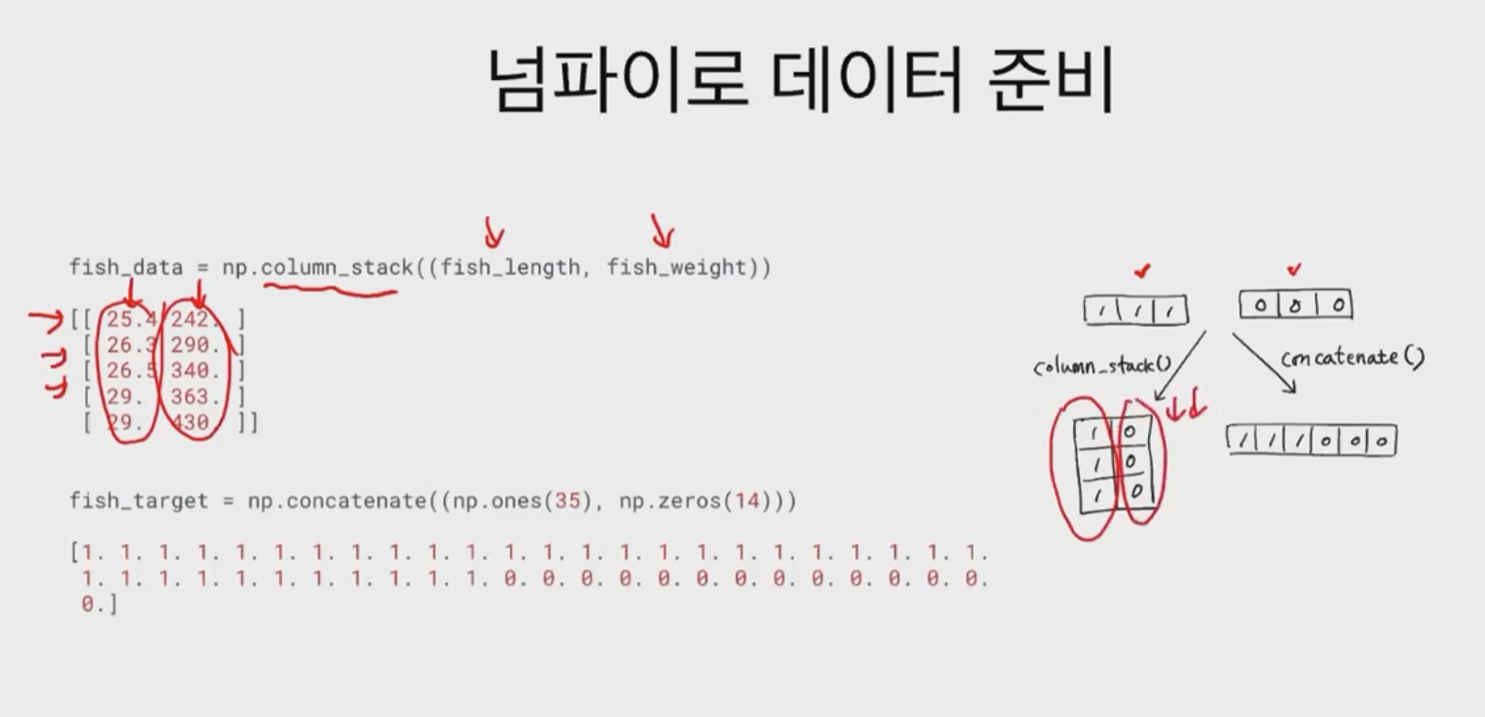

In [ ]:
#fish_data = [[l, w] for l, w in zip(fish_length, fish_weight)]
#fish_target = [1]*35 + [0]*14

이전 시간에는 위 코드처럼 fish_length와 fish_weight를 파이썬 리스트로 만들어 파이썬의 리스트 내포를 사용하여 zip함수로 for문으로 돌려 두 리스트를 하나로 만들어 리스트의 리스트를 만들었었다.  
이번 시간에는 넘파이를 이용하여 조금 더 고급진 방법으로 하나로 합쳐보자.  
이전과 똑같이 샘플을 행에 두고 특성을 열에둔 2차원 배열을 만드는 것이 목적이다. 이를 위해 넘파이에서 제공하는 column_stack을 이용하자 column_stack은 주어진 두 배열을 나란히 세운 다음 차례대로 열로 붙여준다.
(비슷한 함수로 row_stack)이 존재한다. 이것은 행방향으로 쌓는다.)
우리는 특성을 열방향으로 쌓아야하기 때문에 을 사용한다.
추가로 concatenate()라는 함수는 가로방향으로(일렬로) 이어붙인다.

```
[[25.4 242.]
 [26.3 290.]
 [26.5 340.]
 [29.  363.]
 [29.  430.]]
```

In [ ]:
# 도미와 빙어 데이터를 합치기
fish_data = np.column_stack((fish_length, fish_weight))

또한 지난시간에는 타깃 데이터를 ```#fish_target = [1]*35 + [0]*14``` 와 같이 만들었었는데 이번시간에는 넘파이의 ```ones()``` 함수와 ```zeros()``` 함수를 이용하여 만들어주자.

In [ ]:
fish_target = np.concatenate((np.ones(35), np.zeros(14)))

```ones()``` 함수는 숫자 1으로 채워진 행 또는 열을 만들 수 있으며, ```zeros()```는 0으로 채워진 행 또는 열을 만들 수 있다. 밑의 예시를 보고 연습하도록 하자.

In [ ]:
# 1로 채워진 2행 3열 배열 만들기
np.zeros((2,3))

array([[0., 0., 0.],
       [0., 0., 0.]])

In [ ]:
# 1로 채워진 2행 3열 배열 만들기
np.ones([2,3])

array([[1., 1., 1.],
       [1., 1., 1.]])

In [ ]:
# 9로 채워진 2행 3열 배열 만들기 
np.full((2,3), 9)

array([[9, 9, 9],
       [9, 9, 9]])

### 사이킷런으로 데이터 나누기

머신러닝에서 필요한 도구들은 사이킷런에서 굉장히 많이 제공된다.  
훈련 세트와 테스트 세트를 나누는 작업도 항상 필요한 작업이므로 사이킷런에서 준비되어있다.  
sklearn의 model_selection 모듈 밑의 train_test_split() 라는 함수에서 제공되고 있다.  
장점은 fihs_data와 fish_target데이터를 한번에 넣어서 나눌 수 있으며, 여러개의 배열을 더 입력하여 사용할 수 있다.  
그 다음 stratify라는 매개변수를 사용하는데 ```분류```의 경우 ```샘플링 편향```이 생기지 않도록 타깃 클래스가 골고루 섞어야하는데 이를 위한  인자값이라고 생각하면 된다. 훈련데이터가 크고 비교적 클래스가 균등하게 섞여있다면 적당히 랜덤으로 섞어도 되지만 그렇지 못한 경우나 특정 클래스 샘플이 상대적으로 적을 경우 그냥 랜덤하게 섞었을 때 안들어갈 수도 있다. 이때 stratify 인자값에 target 배열을 전달해주면 타깃 배열을 보고 타깃값이 골고루 섞이도록 훈련세트와 테스트세트를 나누어준다. 따라서 분류문제의 경우 stratify 파라메터값을 입력해주는 것이 좋다.  
마지막으로 random_state값은 지난 시간에 배웠던 것과 같이 랜덤 시드를 설정하는 것인데 실전에서는 따로 필요하진 않다. 책이나 튜토리얼에서 결과를 그대로 재연하기 위함이다.

In [ ]:
from sklearn.model_selection import train_test_split

train_input, test_input, train_target, test_target = train_test_split(
    fish_data, fish_target, stratify=fish_target, random_state=42
)


In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier()

kn.fit(train_input, train_target)
kn.score(test_input, test_target)

1.0

### 수상한 도미
훈련을 완료한 데이터의 스코어가 100%로 나왔다.  
그렇다면 임의의 무게와 크기를 넣어주었을 때 모델은 과연 빙어로 예측할까? 도미로 에측할까?  
predict() 함수에 길이 25cm, 무게 150g 을 입력해보자

In [ ]:
print(kn.predict([[25, 150]])) # 길이와 무게를 봤을 때 도미에 가까운데 빙어(0)으로 표시되고 있다.

[0.]


길이와 무게가 도미에 가깝지만 해당 모델은 빙어(0)으로 예측하고 있다.  
우리는 이 문제를 쫌 더 정확하게 파악할 필요가 있다.  
따라서 kneighbors() 함수를 이용하고 알고리즘이 바라보는 이웃의 샘플 인덱스를 출력해보자.  
이 매서드를 이용하면 생선 데이터(25cm 150g)를 넣었을 때 해당 데이터와 가장 가까운 5개의 샘플까지의 거리와 인덱스를 반환할 수 있다.

In [ ]:
# K-최근접이웃알고리즘이 바라보는 이웃의 샘플 인덱스를 뽑을 수 있다.
distances, indexes = kn.kneighbors([[25, 150]]) # 25cm, 150g

In [ ]:
distances

array([[ 92.00086956, 130.48375378, 130.73859415, 138.32150953,
        138.39320793]])

In [ ]:
indexes

array([[21, 33, 19, 30,  1]])

In [ ]:
train_input

array([[  29.7,  500. ],
       [  12.2,   12.2],
       [  33. ,  700. ],
       [  11.3,    8.7],
       [  39.5,  925. ],
       [  29. ,  430. ],
       [  36. ,  714. ],
       [  36. ,  850. ],
       [  31. ,  475. ],
       [  35. ,  720. ],
       [  37. , 1000. ],
       [  11.2,    9.8],
       [  34.5,  620. ],
       [  12. ,    9.8],
       [  29. ,  363. ],
       [  33. ,  700. ],
       [  30.7,  500. ],
       [  38.5,  955. ],
       [  33.5,  650. ],
       [  14.3,   19.7],
       [  31.5,  500. ],
       [  25.4,  242. ],
       [   9.8,    6.7],
       [  32. ,  600. ],
       [  10.5,    7.5],
       [  33.5,  610. ],
       [  10.6,    7. ],
       [  35. ,  700. ],
       [  32. ,  600. ],
       [  35. ,  725. ],
       [  13. ,   12.2],
       [  30. ,  450. ],
       [  32. ,  340. ],
       [  15. ,   19.9],
       [  30. ,  390. ],
       [  41. ,  975. ]])

In [ ]:
train_input[indexes]

array([[[ 25.4, 242. ],
        [ 15. ,  19.9],
        [ 14.3,  19.7],
        [ 13. ,  12.2],
        [ 12.2,  12.2]]])

In [ ]:
import matplotlib.pyplot as plt

plt. (train_input[:, 0], train_input[:,1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1],
            marker='D')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

표를 보면 눈으로 보더라도 도미로 구분되는데도 불구하고 빙어로 분류되어지고 있다.  
이렇게 잘못되는 이유는 x축의 범위는 0~40이고 y축은 0에서 1000이다.  
따라서 눈으로 보았을 때는 도미에 가깝지만 가깝지 않은 결과가 되어버리는 것이다.  
 

<br/><br/>
### 기준을 맞춰라
앞서 언급했듯이 x축의 스케일과 y축의 스케일이 맞지않아 육안으로는 도미에 가까운 데이터가 빙어로 분류되는 상황이 존재한다.  
아래 그림을 보자.  
마름모 데이터와 삼각형 데이터의 x축 거리가 130이고, 상단에 있는 마름모 데이터와 삼각형 데이터의 y축 거리는 92이다.  
양측의 데이터 거리가 크게 차이 나지 않음에도 불구하고 육안으로는 매우 멀리 떨어져있는 것처럼 보인다.  
이것이 바로 x축과 y축의 스케일이 맞지 않아 일어나는 오류이다.  
이 부분을 수정해보기 위해 plt에서 제공하는 ```xlim()``` 함수를 이용해보자  
xlim()함수는 축의 범위(스케일)을 수동으로 지정할 수 있는 매서드이다.  
똑같은 스케일 지정을 위해 0과 1000으로 지정해보자.

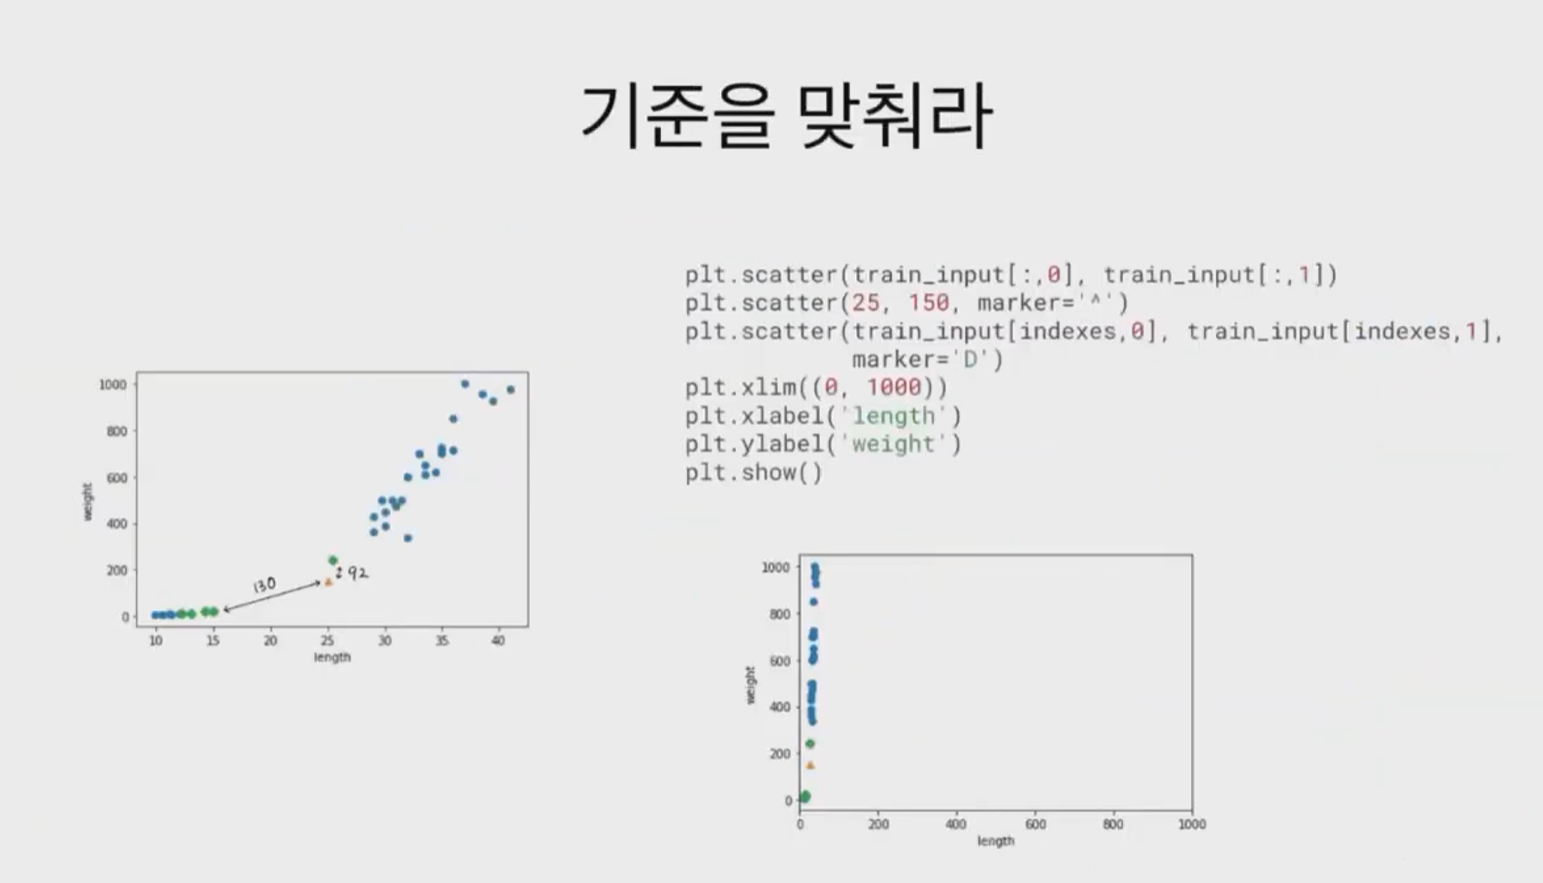

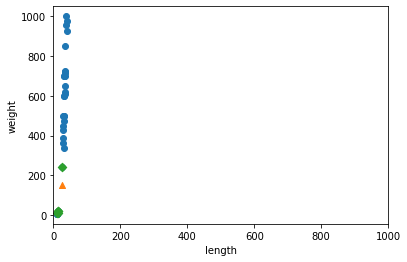

In [ ]:
plt.scatter(train_input[:, 0], train_input[:, 1])
plt.scatter(25, 150, marker='^')
plt.scatter(train_input[indexes, 0], train_input[indexes, 1],
            marker='D')
plt.xlim(0, 1000) # 스케일 수동 조정
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

출력된 표가 x축, y축 모두 0에서 1000으로 설정된 것을 확인할 수 있다.  
또한 해당 표를 통해 삼각형 데이터(25, 150) 특성이 빙어로 분류될 수 있다는 것을 확인할 수 있다.  
또한 여기서 다시 한번 알 수 있는 부분은 두 샘플의 스케일을 공정하게 맞춰주는 작업이 필요하다는 것을 깨닳았을것이다.  
특성의 스케일을 맞춰주는 알고리즘은 상당히 많다.  
앞으로도 이 작업을 자주할텐데, (특별히 5장에서 볼 트리기반의 알고리즘은 이런 스케일의 영향을 받지 않는다. 또한 성능도 뛰어나 많은 사람들이 선호하고있다. 이 부분은 나중에 다시 언급하도록 하겠다.)
그렇다면 기준을 맞춰야하는데 어떤 변환을 해야할지 알아보도록 하자.

### 기준을 맞춰라 - 표준점수로 바꾸기
기준을 맞추기 위한 여러가지 변환 방법이 존재하지만, 가장 널리 사용되는 방법중 하나가 ```표준 점수```이다.  
표준 점수는 **특성을 그 특성의 평균으로 빼고 표준편차로 나누는 방식**이다.  이것을 표준점수 혹은 Z 점수 라고 한다.  
사이킷런에는 이 방식의 도구를 제공하고 있다. 하지만 이번 시간에는 수동으로 코드를 작성하여 그 의미를 더 잘 알아보고 넘어가도록 하자

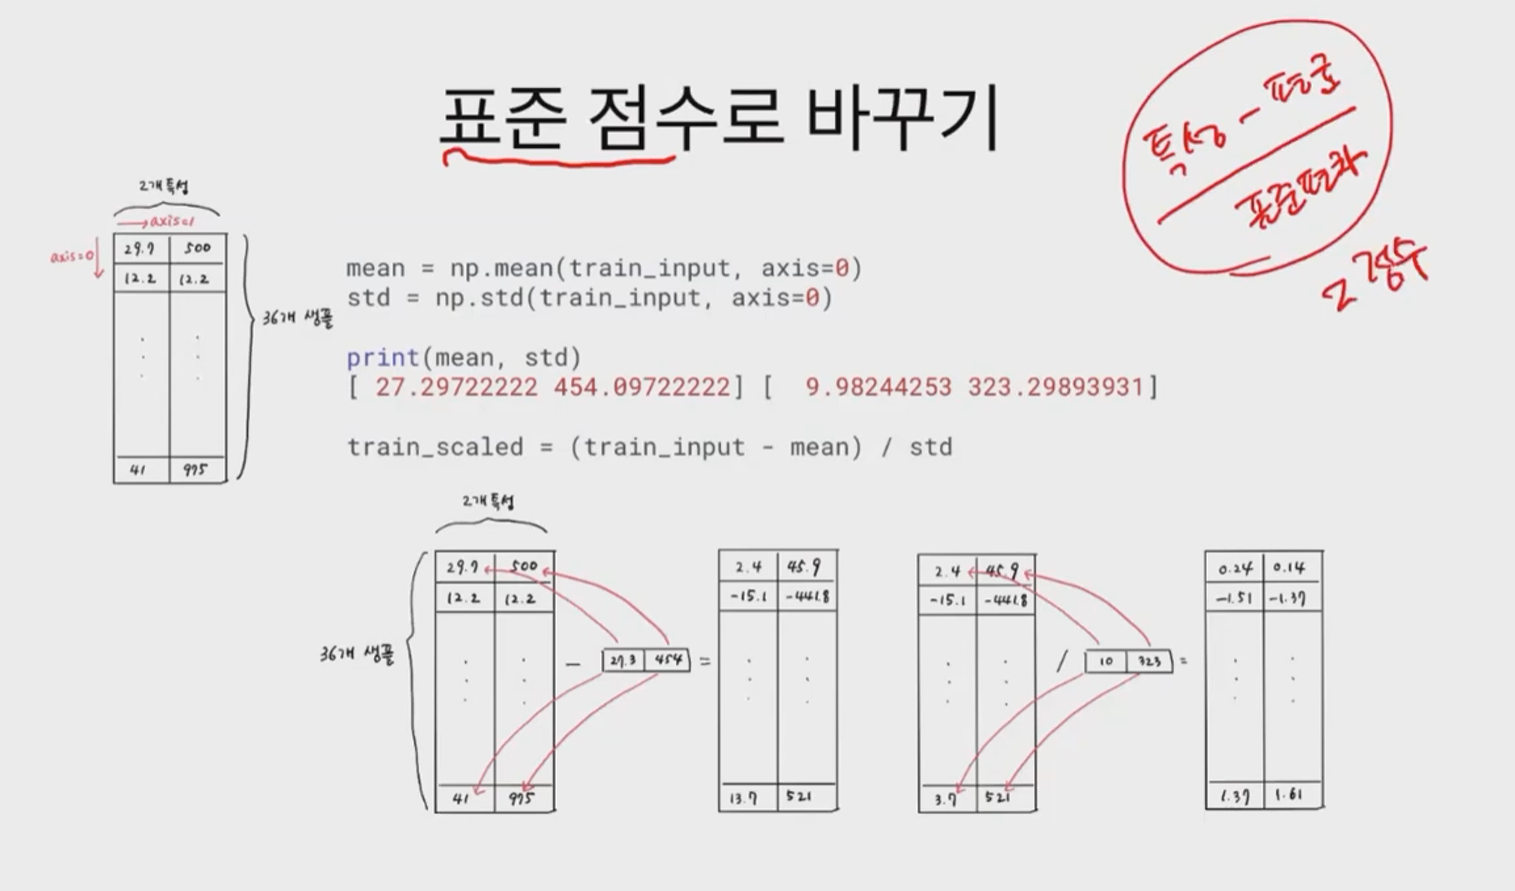  
(*사이킷런에서는 표준 점수 변환방식 도구를 제공하고 있다. 하지만 이번 시간에는 수동으로 적용을 할 것이다. 직접 수동으로 변환하며 그 의미를 더 잘 알아보도록하자*)

In [ ]:
# 1. 길이 방향의 특성과 무게 특성의 평균을 따로 구해야한다. (전체 샘플에 대해 평균을 구하는 것.)
# 이는 파이썬으로 구할 수 있지만 넘파이의 mean() 함수와 std() 함수를 이용하여 수행해보자.

# 넘파이의 mean()함수를 이용하여 평균을 구하고, std() 함수로 표준편차를 구한다. 
mean = np.mean(train_input, axis=0) #변환하고자 하는 배열을 넣고 축을 설정 -> 
# 0 으로 설정시 : 행(세로)을 따라 쭉 계산
# 1 로 설정시 : 각 행을 따로따로 평균을 구한다.(샘플마다 하나씩 구해짐) 해당 데이터의ㅣ 경우 36개의 샘플이 있으므로 36개의 평균이 구해짐

std = np.std(train_input, axis=0)
# 표준편차도 마찬가지로 각 특성별로 구해야한다. 

print(mean, std)
# 이렇게 두개의 값을 구할 수 있다.

train_scaled = (train_input - mean) / std
# 현재 mean의 크기는 (1,2) 크기이다. 하지만 train_input은 (36, 2 -> 샘플이 36개 특성이 2개)의 크기이다. 
# 이 경우 넘파이가 알아서 모든 행에 대해서 다 적용하여 빼준다.
# 따라서 각각 행별로 뺀 값을 다시 배열로 만들어주기 때문에 결과는 (36, 2) 크기의 배열이 나온다.
# 즉, train_input에서 각 행마다 뺄셈ㅇ르 수행해서 결과를 반환한다. 이것을 넘파이의 '브로드 캐스팅'이라고하며 많이 사용하는 매우 효율적인 방식이다.

# 표준편차도 마찬가지로 각 행별로 수행하여 동일한 크기로 반환한다.

[ 27.29722222 454.09722222] [  9.98244253 323.29893931]


### 수상한 도미 다시 표시하기
현재 데이터의 표준 점수가 바뀌었으므로 예측하고자하는 데이터역시 훈련세트의 평균과 표준편차에 맞춰 변환해야한다.  
*어떤 데이터든지 새로운 예측을 할 때 피룡한 데이터나 모델을 평가하기 위해 준비된 테스트세트나 데이터 변환은 훈련세트를 기준으로 한다는 것을 유념하자* 

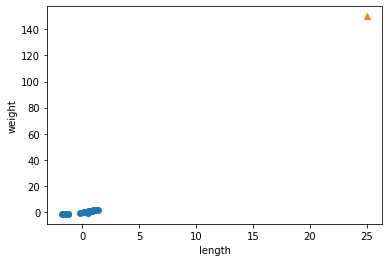

In [ ]:
# 예측 데이터 표준 점수 변환 전
plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter([25], [150], marker='^')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

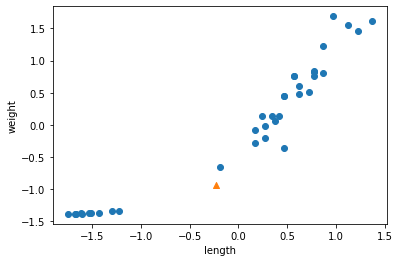

In [ ]:
# 예측 데이터 표준 점수 변환 후

new = ([25, 150] - mean) / std #훈련세트에 맞춰 테스트 세트 표준 점수 수정

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

이제 변환된 데이터를 이용하여 최근접이웃 모델을 다시 학습시켜보자

### 전처리 데이터에서 모델 훈련

[1.]


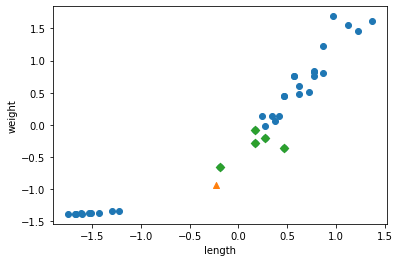

In [ ]:
kn.fit(train_scaled, train_target)

test_scaled = (test_input - mean) / std #앞서 언급한 것처럼 테스트 입력 데이터를 그대로 사용할 수는 없다. 이전 표처럼 동떨어지기 때문에 전혀 예측이 맞지 않는다. 
# 따라서 테스트 인풋도 훈련 세트의 스케일로 바뀌어야한다. (훈련 세트의 평균과 표준편차를 꼭 사용하자)
kn.score(test_scaled, test_target) # 타깃데이터는 1,0 데이터일 뿐이므로 스케일을 조정하는 대상이 아니다.

print(kn.predict([new]))

distances, indexes = kn.kneighbors([new]) # kneighbors() 함수는 new샘플과 가장 가까운 다섯개의 샘플의 거리와 인덱스를 추출하여 반환해준다.

plt.scatter(train_scaled[:, 0], train_scaled[:, 1])
plt.scatter(new[0], new[1], marker='^')
plt.scatter(train_scaled[indexes, 0], train_scaled[indexes, 1], marker='D')
plt.xlabel('length')
plt.ylabel('weight')

plt.show()

오늘은 데이터를 전처리 하는 방법과 왜 전처리를 해야하는지 소개했다.  
특성의 스케일은 민감한 부분이기 때문에 꼭 전처리가 필요하다.  
특성을 전처리하지 않아도 되는 모델은 '트리'기반의 모델으로 이 부분은 5장에서 배울 것이다.  
다음 시간은 '회귀' 알고리즘에 대해 알아보자